# Data cleaning et programmation method chaining (pandas)

**Francis Wolinski**

Consultant scientifique indépendant depuis 2013, bénéficiaire du programme résidentiel de **datacraft**
- Audit, Conseil et Projets en Data Science
- Formations professionnelles sur le langage Python pour la Data Science
- Responsable d'un MSc en IA à SKEMA

Juin 2023

## Plan

Cet atelier reprend l'essentiel de l'atelier donné en février 2022 avec une partie supplémentaire sur la préparation des données.

1. **Introduction**
2. **Programmation avec pandas**
3. **Chargement des données**
4. **Data Preparation** <span style="color:orange;font-weight:bold">&starf; NEW &starf;</span>
5. **Autres datasets**
6. **Conclusion**

Librairies et versions utilisées dans ce notebook :
- **IPython** 8.13.2
- **numpy** 1.24.3
- **pandas** 2.0.1
- **matplotlib** 3.7.1
- **sparklines** 0.4.2

## 1. Introduction

L'objectif de cet atelier n'est pas d'effectuer une introduction à **pandas** mais plutôt de présenter quelques caractéristiques de la librairie, ainsi que les enseignements tirés d'une utilisation intensive et dans de nombreux contextes depuis 2015.

**Méthodologie CRISP-DM**

**CR**oss-**I**ndustry **S**tandard **P**rocess for **D**ata **M**ining

Etablie par la société SPSS (Statistical Package for the Social Sciences) en 2000 qui a été rachetée par IBM en 2009.

A noter : le logiciel SPSS est un peu l'ancêtre de dataiku.

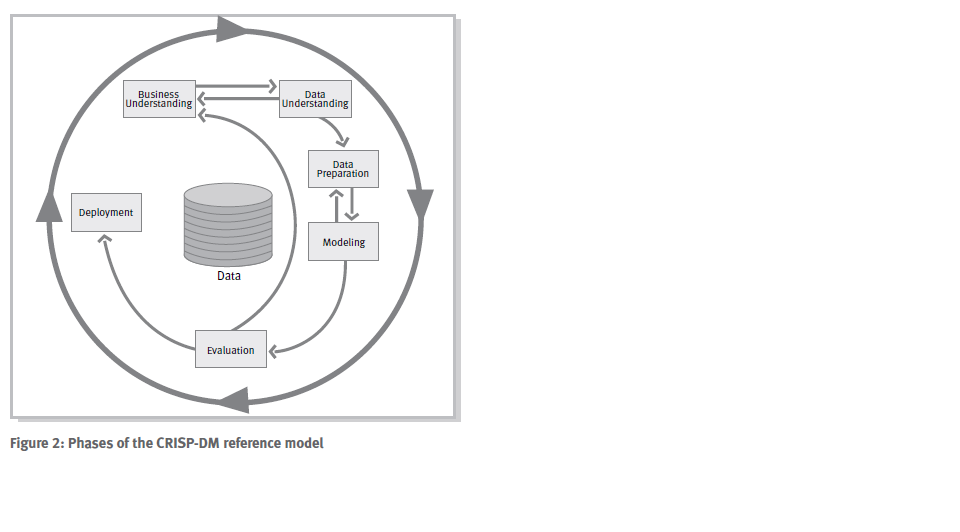

In [1]:
# load image from pandas books
from IPython.display import Image

# load CRISP-DM
Image("images/schema-crisp-dm.png", width=960, height=532)

La librairie **pandas** peut être notamment mise en oeuvre dans les processus : *Data Understanding*, *Data Preparation* et aussi *Modeling* (directement et indirectement via **matplotlib**, **scikit-learn** et autres).

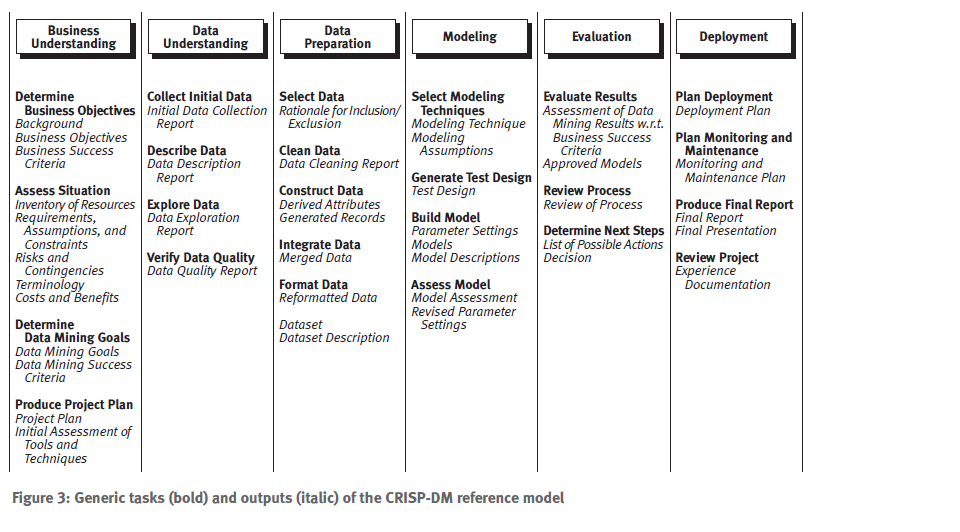

In [2]:
# load CRISP-DM
Image("images/process-crisp-dm.png", width=960, height=532)

Source :
- *CRISP-DM 1.0 - Step-by-step data mining guide*, 2000, https://www.the-modeling-agency.com/crisp-dm.pdf

La Data Preparation est souvent la partie la plus chronophage d'un projet data.

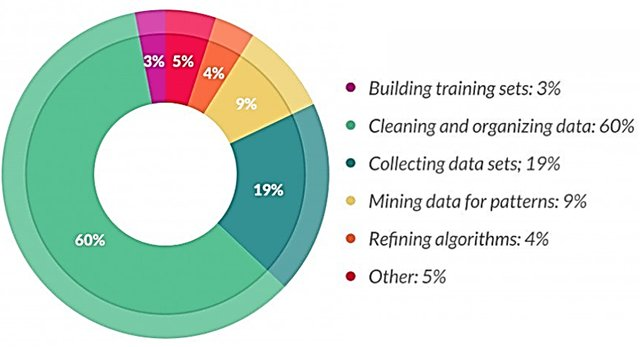

In [3]:
Image("images/What-data-scientists-spend-the-most-time-doing-7_W640.jpg", width=640, height=347)

Source :
- *Cleaning Big Data: Most Time-Consuming, Least Enjoyable Data Science Task, Survey Says*, Forbes 2016, https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/

**Données de Stack Overflow**

**pandas** est sans doute la librairie Python la plus mentionnée dans *Stack Overflow* sur la période 2018-2023.

A noter : la baisse de plus de 1% constatée à partir de 2022 correspond à une baisse générale du langage Python sur *Stack Overflow* qui est passé de 17% début 2022 à 14% courant 2023.

Sans doute un effet de **CoPilot** et de **ChatGPT** !

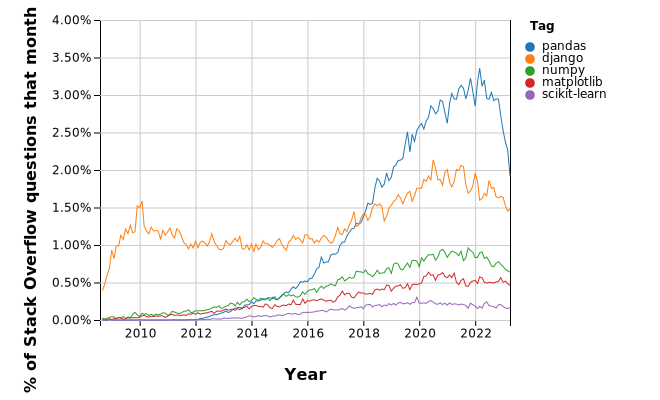

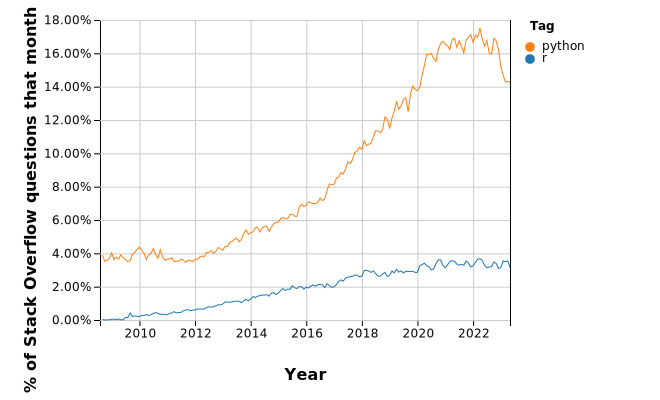

In [4]:
# load image from Stack Overflow
from IPython.display import SVG

display(SVG("images/stackoverflow.svg"))
display(SVG("images/stackoverflow2.svg"))

Sources :
- *pandas: powerful Python data analysis toolkit*, github, 2022, https://github.com/pandas-dev/pandas
- Kevin Markham, *What's the future of the pandas library?*, 2018, https://www.dataschool.io/future-of-pandas/
- Stack Overflow Trends, https://insights.stackoverflow.com/trends?tags=r%2Cpython
- David F. Carr, *Stack Overflow is ChatGPT Casualty: Traffic Down 14% in March*, 2023, https://www.similarweb.com/blog/insights/ai-news/stack-overflow-chatgpt/

**ADN de la librarie**

Pour mémoire, le nom **PANDAS** vient de l'acronyme **PAN**el (3D) + **DA**taframe (2D) + **S**eries (1D). La classe *Panel* a disparu (dépréciée en 2017 et supprimée en 2019), mais le nom de la librairie a été conservé !

Il s'avère que la librairie évolue en permanence (ajouts, modifications, dépréciations) :

version | date
-|-
 0.25 | octobre 2019
1.0.0 | janvier 2020
1.1.0 | juillet 2020
1.2.0 | décembre 2020
1.3.0 | juillet 2021
1.4.0 | juillet 2022
1.5.0 | septembre 2022
2.0.0 | avril 2023

Les conséquences sont :
- Obsolescence rapide des connaissances du data scientist
- Nécessité de gérer un environnement virtuel par projet


Pour information, la version **pandas 2.0** sortie récemment apporte un certain nombre de nouveautés dont l'intégration d'un backend supplémentaire possible en remplacement de **NumPy** : *pyarrow* (Apache Arrow).

*Using pyarrow means you a speed up and makes for more memory-efficient operations, because you can take advantage of the C++ implementation of Arrow… an open-source and language-agnostic columnar data format to represent data in memory. It can enable zero-copy sharing of data between processes.*

*The Apache Arrow in-memory data representation includes an equivalent representation as part of its specification. By using Arrow, pandas is able to deal with missing values without having to implement its own version for each data type.*

*PyArrow backed string columns have the potential to impact most workflows in a positive way (...) There is a current proposal in pandas to start inferring strings as PyArrow backed strings by default starting from pandas 3.0.*

Sources :
- *What’s new in Pandas 2.0?*, Towards Data Science, 2023, https://towardsdatascience.com/whats-new-in-pandas-2-0-5df366eb0197
- *Utilizing PyArrow to Improve pandas and Dask Workflows*, Towards Data Science, 2023, https://towardsdatascience.com/utilizing-pyarrow-to-improve-pandas-and-dask-workflows-2891d3d96d2b

## 2. Programmation avec pandas

Avec **pandas**, on est souvent amené à effectuer des séquences d'opérations sur des objets de type *Series* ou *DataFrame*.

Il existe plusieurs styles de programmation. Le style en vogue depuis quelques années est le *Method Chaining*.

### 2.1 Inplace parameter

Dans ce style de programmation, on modifie l'objet sur place à chaque étape.

```python
df.method1(inplace=True)
df.method2(inplace=True)
df.method3(inplace=True)
```

> <span style="background-color:yellow">The pandas core team discourages the use of the inplace parameter.</span>

En fait, l'utilisation de l'option `inplace=True` ne garantit pas l'absence de copie en mémoire. C'est dû à la gestion de la mémoire par le *BlockManager* qui éclate les données d'un *DataFrame* en autant de *ndarrays* par type de données (int, float, object...).

Source :
- Uwe Korn, *The one pandas internal I teach all my new colleagues: the BlockManager*, 2020 https://uwekorn.com/2020/05/24/the-one-pandas-internal.html

### 2.2 Variable assignment

Dans ce style de programmation, on affecte à une variable le résultat de chaque opération. Ce style peut conduire à la création de nombreuses variables intermédiaires qui sont peu utilisées.

```python
df = df.method1()
df = df.method2()
df = df.method3()
```

### 2.3 Method chaining

Dans ce style de programmation, on enchaîne systématiquement les opérations au fur et à mesure sur l'objet qui résulte de l'opération précédente. L'ensemble des enchaînements est encapsulé entre parenthèses pour des raisons syntaxiques.

```python
(df
 .method1()
 .method2()
 .method3()
)
```

<span style="background-color:yellow">The pandas core team now encourages the use of "method chaining"</span>. This is a style of programming in which you chain together multiple method calls into a single statement. This allows you to pass intermediate results from one method to the next rather than storing the intermediate results using variables.

Sources:

- Matt Harrison, *Effective Pandas*, 2021, https://store.metasnake.com/effective-pandas-book

- Bindi Chen, *Using Pandas Method Chaining to improve code readability - A tutorial for the best practice with Pandas Method Chaining*,  2020 https://towardsdatascience.com/using-pandas-method-chaining-to-improve-code-readability-d8517c5626ac

- Adiamaan Keerthi, *The Unreasonable Effectiveness of Method Chaining in Pandas*, 2019, https://towardsdatascience.com/the-unreasonable-effectiveness-of-method-chaining-in-pandas-15c2109e3c69

- Kevin Markham, *What's the future of the pandas library?*, 2018, https://www.dataschool.io/future-of-pandas/

- Marc Garcia, *Towards Pandas 1.0*, PyData London Meetup #47, August 2018 https://www.youtube.com/watch?v=hK6o_TDXXN8

Il existe des méthodes spéciales qui facilitent ou permettent le chaînage des instructions avec **pandas** en utilisant essentiellement une **notation fonctionnelle** :

- **En particulier**
    - `s.loc[lambda s_: ...]` ou `df.loc[lambda df_: ...]` : sélections fonctionnelles sur les objets de type *Series* ou *DataFrame* sans avoir à désigner explicitement les objets sur lesquels portent les sélections,
    - `df.assign(col=lambda df_: ...)`  ou `assign(**{col=lambda df_: ...})`: utilisation de mot-clés, ou d'un dictionnaire, généralisant l'usage d'une notation fonctionnelle pour modifier ou ajouter des colonnes à un *DataFrame*,
    - `s.pipe(func, *args, **kwargs)` ou `df.pipe(func, *args, **kwargs)`: application d'une fonction prenant en premier argument un objet de type *Series* ou *DataFrame*,


- **Egalement**
    - `eq()`, `ne()`, `gt()`, `ge()`, `lt()`, `le()`... : pour toutes les comparaisons binaires sur les objets de type *Series* ou *DataFrame*,
    - `add()`, `sub()`, `mul()`, `div()`, `mod()`, `pow()`... : pour toutes les opérations binaires sur les objets de type *Series* ou *DataFrame*,
    - `where(cond, other)` (resp. `mask(cond, other)`) : remplace les valeurs d'un objet de type *Series* ou *DataFrame* si la condition est fausse (resp. vraie).
    - `transform(func, *args, **kwargs)` : modification d'un objet de type *Series* ou *DataFrame* par application d'une fonction s'appliquant à chacune de ses valeurs,
    - etc.

**Remarque** : Pour les *DataFrames*, il est toujours possible d'avoir des noms de colonnes quelconques, mais la notation pousse un peu à utiliser des noms de colonnes utilisables comme attributs. Exemple : `df.col` au lieu de `df["col"]`.

### 2.4 Un premier exemple

On utilise les données de l'Insee sur les prénoms : https://www.insee.fr/fr/statistiques/2540004?sommaire=4767262

> Le fichier des prénoms contient des données sur les prénoms attribués aux enfants nés en France entre 1900 et 2021.

In [5]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# display options
pd.set_option("display.min_rows", 16)
pd.set_option("display.max_columns", 36)

On charge les données et on les prépare en *variable assignment* (qu'on passera en *method chaining* un peu plus loin). On obtient un *DataFrame* avec le nombre de naissances en France par année depuis 1900, par genre et par prénom.

In [6]:
# load and process nat2020_csv.zip
df_names = pd.read_csv('data/nat2021_csv.zip',
                  sep=';',
                  header=0,
                  names=['gender', 'name', 'year', 'births'],
                  na_values={"name":"_PRENOMS_RARES", "year":"XXXX"},
                  keep_default_na=False)

# prep names with variable assignment
def prep_names0(df):
    df = df.copy()
    df = df.dropna()
    df = df.loc[df["name"].str.len() > 1]
    df["gender"] = df["gender"].map({1:"M", 2:"F"})
    df["name"] = df["name"].str.title()
    df = df.astype({'gender':'category', 'year':'uint16', 'births':'uint16'})
    df = df[["year", "name", "gender", "births"]]
    df = df.sort_values(["year", "gender", "births", "name"], ascending=[True, True, False, True])
    df = df.reset_index(drop=True)
    return df

df_names0 = prep_names0(df_names)
df_names0

,year,name,gender,births
0,1900,Marie,F,48713
1,1900,Jeanne,F,13981
2,1900,Marguerite,F,8058
3,1900,Germaine,F,6981
4,1900,Louise,F,6696
5,1900,Yvonne,F,5096
6,1900,Madeleine,F,4959
7,1900,Suzanne,F,4954
...,...,...,...,...
648322,2021,Édem,M,3


In [ ]:
(df
 .copy()
 .dropna()
 .loc[lambda df_: df_['name'].str.len() > 1]
 .assign(gender=lambda df_: df_['gender'].map({(1): 'M', (2): 'F'}), 
         name=lambda df_: df_['name'].str.title())
 .astype({'gender': 'category', 'year': 'uint16', 'births': 'uint16'})
 .loc[:, ['year', 'name', 'gender', 'births']]
 .sort_values(['year', 'gender', 'births', 'name'], ascending=[True, True, False, True])
 .reset_index(drop=True)
)

**Exemple résolu**
- Graphique avec l'évolution dans le temps de la diversité des prénoms qui se terminent par une lettre donnée, et ce, pour les 7 lettres qui présentent le plus de diversité la dernière année.

**En variable assignment**

En *variable assignment*, on utilise des variables intermédiaires qui sont utilisées peu de fois et qui encombrent la mémoire de Python (*private heap*), et aussi celle du data scientist !

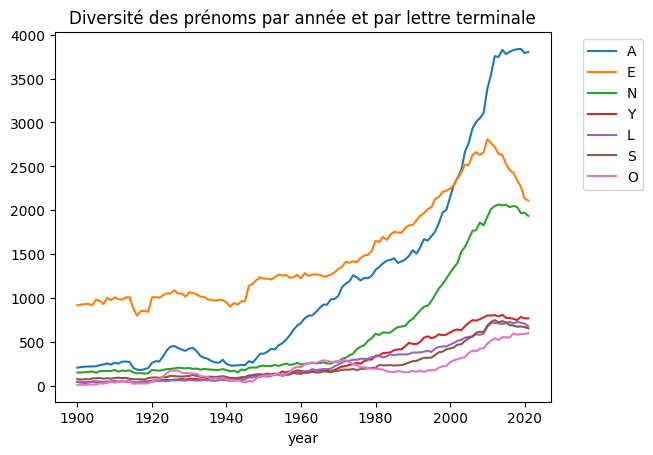

In [7]:
# variable assignment
df_names1 = df_names0.copy()
df_names1['terminal'] = df_names1['name'].apply(lambda x: x[-1].upper())
tab = df_names1.pivot_table(values='name',
                            index='year',
                            columns='terminal',
                            aggfunc='count',
                            fill_value=0)
cols = tab.iloc[-1].nlargest(7).index
ax = tab[cols].plot.line(title='Diversité des prénoms par année et par lettre terminale')
ax.legend(bbox_to_anchor=(1.05, 1.0));

**En method chaining**

Aucune variable intermédiaire n'est utilisée.

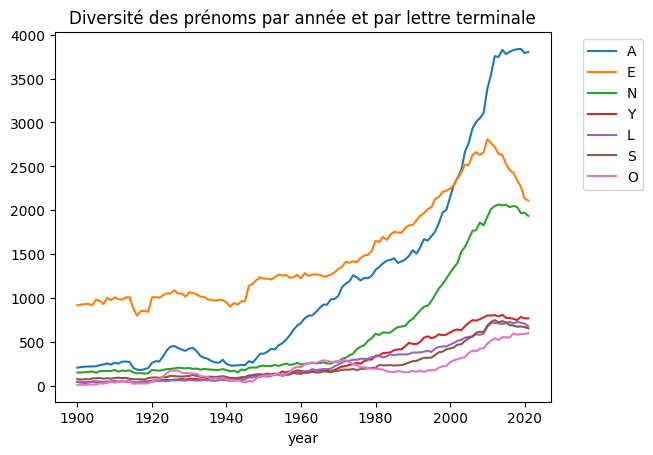

In [14]:
# method chaining
(df_names0
 .assign(terminal=lambda df_: df_.name.apply(lambda x: x[-1].upper()))
 .pivot_table(values='name',
              index='year',
              columns='terminal',
              aggfunc='count',
              fill_value=0)
 .pipe(lambda df_: df_[df_.iloc[-1].nlargest(7).index])
 # plot
 .plot
 .line(title='Diversité des prénoms par année et par lettre terminale')
 .legend(bbox_to_anchor=(1.05, 1.0))
);

**Remarque** : En *method chaining*, on peut facilement afficher et comprendre les calculs intermédiaires en commentant et en décommentant les instructions (et en suprimant le caractère ";" à la fin).

**Exemple**

- Implémenter une fonction en *method chaining* qui produit un graphique avec l'évolution du nombre de naissances d'un prénom et d'un genre au fil des ans.

In [34]:
# %load exemples/01_plot_name_gender.py
# Graphique avec le nombre de naissances d'un prénom et d'un genre
def plot_name_gender(df, name, gender):
    return (df
             .loc[lambda  df_: (df_.name == name) & (df_.gender == gender)]
             .set_index("year")
             .plot
             .line(title=f"Evolution du prénom {name} ({gender}) dans le temps")
            )


In [25]:
# f-string
prenom = "marie"
age = 4
f"{prenom} a {age} ans"

'marie a 4 ans'

In [26]:
# mots-clef
"{prenom} a {age} ans".format(prenom=prenom, age=age)

'marie a 4 ans'

In [27]:
# positionnel
"{1} a {0} ans".format(age, prenom)

'marie a 4 ans'

In [28]:
# positionnel
"{} a {} ans".format(prenom, age)

'marie a 4 ans'

In [29]:
a = 4
b = 3
f"{a} x {b} = {a*b}"

'4 x 3 = 12'

In [31]:
# formatage de nombres
f"{np.pi:.2f}"

'3.14'

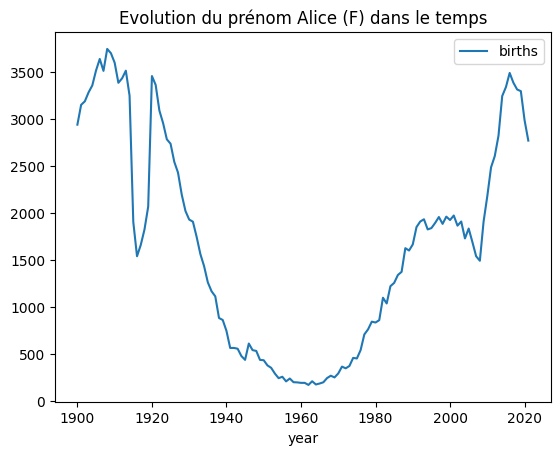

In [35]:
# plot_name_gender
plot_name_gender(df_names1, "Alice", "F");

**Exemple**
- Passer la fonction `prep_names0` en *method chaining*

```python
# prep names with variable assignment
def prep_names0(df):
    df = df.copy()
    df = df.dropna()
    df = df.loc[df["name"].str.len() > 1]
    df["gender"] = df["gender"].map({1:"M", 2:"F"})
    df["name"] = df["name"].str.title()
    df = df.astype({'gender':'category', 'year':'uint16', 'births':'uint16'})
    df = df[["year", "name", "gender", "births"]]
    df = df.sort_values(["year", "gender", "births", "name"], ascending=[True, True, False, True])
    df = df.reset_index(drop=True)
    return df
```

In [43]:
# %load exemples/02_prep_names
# method chaining

#def select(df)
#    return df[["year "name", "gender", "births"]]

def prep_names(df):
    return (df
            .dropna()
            .loc[lambda df_: df_.name.str.len() > 1]
            .assign(gender=lambda df_: df_.gender.map({1:"M", 2:"F"}),
                    name=lambda df_: df_.name.str.title())
            .astype({'gender':'category', 'year':'uint16', 'births':'uint16'})
            # .pipe(lambda df_: df_[["year "name", "gender", "births"]])
            .loc[:, ["year", "name", "gender", "births"]]
            .sort_values(["year", "gender", "births", "name"],
                         ascending=[True, True, False, True])
            .reset_index(drop=True)
           )


In [37]:
df_names0.name.str[:2]

0         Ma
1         Je
2         Ma
3         Ge
4         Lo
5         Yv
6         Ma
7         Su
          ..
648322    Éd
648323    Él
648324    Él
648325    Él
648326    Én
648327    Ér
648328    Ét
648329    Év
Name: name, Length: 648330, dtype: object

In [44]:
# prep_names
df_names1 = prep_names(df_names)
df_names1

,year,name,gender,births
0,1900,Marie,F,48713
1,1900,Jeanne,F,13981
2,1900,Marguerite,F,8058
3,1900,Germaine,F,6981
4,1900,Louise,F,6696
5,1900,Yvonne,F,5096
6,1900,Madeleine,F,4959
7,1900,Suzanne,F,4954
...,...,...,...,...
648322,2021,Édem,M,3


**Exemple**
- On a implémenté une fonction qui affiche l'évolution au fil des ans du genre d'un prénom
- Passer la fonction `plot_gender_evolution0` en *method chaining*

```python
# évolution du genre d'un prénom
def plot_gender_evolution0(df, name):
    selection = df.loc[df['name']==name]
    ratio = df.pivot_table(values="births",
                           index="year",
                           columns="gender",
                           aggfunc="sum",
                           fill_value=0)
    evolution = ratio.div(ratio.sum(axis=1), axis=0)
    evolution.plot.line(title=f'Evolution du genre de {name} au fil des ans')
```

- La tester avec différents prénoms :  *Alix*, *Camille*, *Dominique*, *Charlie*, *Noa*, *Claude*, *Kim*, *Jo*, *George*, ...

In [56]:
# %load exemples/03_plot_gender_evolution
# gender evolution graph for a name
def plot_gender_evolution(df, name):
    return (df
            .loc[lambda df_: df_.name == name]
            .pivot_table(values="births",
                           index="year",
                           columns="gender",
                           aggfunc="sum",
                           fill_value=0)
            .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
            .plot
            .line(title=f'Evolution du genre de {name} au fil des ans')
           )

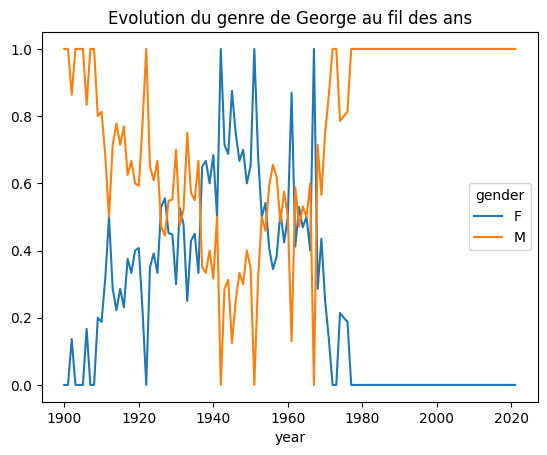

In [58]:
plot_gender_evolution(df_names1, "George");

**Autres exemples (merci à Julien &#9786;)**

- Implémenter une fonction qui sélectionne les N prénoms les plus donnés pendant une décennie.
- Implémenter une fonction qui produit un graphique avec l'évolution au fil des ans des naissances des N prénoms les plus donnés pendant une décennie. La tester avec différentes périodes.

In [ ]:
# %load exemples/04_top_names_decade.py
# Top N prénoms de la décennie
def topn_names_decade(df, year, n=5):
    pass


In [ ]:
topn_names_decade(df_names1, 1900)

In [ ]:
# %load exemples/05_plot_topn_names_decade.py
# Top N prénoms de la décennie
def plot_topn_names_decade(df, year, n=5):
    pass
    

In [ ]:
# decade by decade
for year in range(1900, 2020, 10):
    plot_topn_names_decade(df_names1, year)

## 3. Chargement des données

Il existe de nombreuses fonctions de chargement des données selon le format d'origine, y compris des formats de logiciels propriétaires ; ce qui a certainement contribué au succès de la librairie.

Source : https://pandas.pydata.org/docs/user_guide/io.html

Dans le cadre de cet atelier, seule la fonction `read_csv()` sera abordée.

In [59]:
var = pd.read_html("https://www.geonames.org/countries/")
[df.shape for df in var]

[(1, 2), (250, 9)]

In [62]:
var[1]

,ISO-3166 alpha2,ISO-3166 alpha3,ISO-3166 numeric,fips,Country,Capital,Area in km²,Population,Continent
0,AD,AND,20,AN,Andorra,Andorra la Vella,468.0,77006,EU
1,AE,ARE,784,AE,United Arab Emirates,Abu Dhabi,82880.0,9630959,AS
2,AF,AFG,4,AF,Afghanistan,Kabul,647500.0,37172386,AS
3,AG,ATG,28,AC,Antigua and Barbuda,St. John's,443.0,96286,NaN
4,AI,AIA,660,AV,Anguilla,The Valley,102.0,13254,NaN
5,AL,ALB,8,AL,Albania,Tirana,28748.0,2866376,EU
6,AM,ARM,51,AM,Armenia,Yerevan,29800.0,2951776,AS
7,AO,AGO,24,AO,Angola,Luanda,1246700.0,30809762,AF
...,...,...,...,...,...,...,...,...,...
242,WF,WLF,876,WF,Wallis and Futuna,Mata Utu,274.0,16025,OC


In [63]:
var = pd.read_html("https://fr.wikipedia.org/wiki/Liste_des_pays_par_PIB_nominal")
[df.shape for df in var]

[(3, 3), (114, 3), (195, 3), (211, 3), (212, 3), (14, 2), (4, 2), (6, 2)]

### 3.1 Interprétation automatique des valeurs manquantes

Par défaut, en utilisant le backend **NumPy**, la librairie **pandas** interprète automatiquement certaines chaînes de catactères comme étant des valeurs manquantes. 

In [64]:
# default NaN values
print(pd._libs.parsers.STR_NA_VALUES)

{'', '1.#IND', 'null', '-nan', 'N/A', '-1.#QNAN', '#N/A N/A', '#NA', 'n/a', 'NULL', '-1.#IND', '1.#QNAN', 'nan', '#N/A', 'None', 'NA', 'NaN', '<NA>', '-NaN'}


**Remarque** : &#9888; L'interprétation automatique de certaines valeurs peut gêner voir fausser la phase de *Data Understanding*. On va en voir quelques exemples.

**Exemple**

On charge le dataset des prénoms français avec les valeurs manquantes par défaut.

In [65]:
# load with default missing values
df_names1 = pd.read_csv('data/nat2021_csv.zip',
                         sep=';')
na1 = df_names1.isna().sum()
na1

sexe        0
preusuel    2
annais      0
nombre      0
dtype: int64

On charge le même dataset avec le type `str` et en neutralisant les valeurs manquantes par défaut (chaîne vide uniquement).

In [66]:
# load without missing values except ""
df_names0 = pd.read_csv('data/nat2021_csv.zip',
                  sep=';',
                  dtype=str,
                  na_values="",
                  keep_default_na=False)
na0 = df_names0.isna().sum()
na0

sexe        0
preusuel    0
annais      0
nombre      0
dtype: int64

Calcul des écarts entre les nombres de valeurs manquantes.

In [67]:
# differences of missing values
na1 - na0

sexe        0
preusuel    2
annais      0
nombre      0
dtype: int64

Quels noms sont considérés comme des valeurs manquantes ?

In [68]:
# which names are interpretted as NaN
((df_names0["preusuel"].value_counts() - df_names1["preusuel"].value_counts())
 .loc[lambda s_: s_ != 0]
 .index
 .tolist()
)

['NA']

Dans ce dataset, *NA* est un prénom d'origine chinoise.

**Exemples**

- On considère le dataset "cities15000.zip" : villes mondiales fournies par le site https://www.geonames.org/
- Charger ce dataset sans interprétation des valeurs manquantes (à l'exception de la chaîne vide "").
- Calculer les écarts des nombres de valeurs manquantes entre les 2 *DataFrames*.
- Quels sont les "country_code" et les "admin2_code" qui sont interprétés comme des valeurs manquantes.
- Pour les "admin2_code" interprétés comme des valeurs manquantes, quels sont les "country_code" des pays concernés ?

In [69]:
# load with default missing values
df_cities1 = pd.read_csv('data/cities15000.zip',
                         sep='\t',
                         header=None,
                         dtype=str,
                         names=['geonameid', 'name', 'asciiname', 'alternatenames', 'latitude', 'longitude', 'feature_class', 'feature_code', 'country_code', 'cc2', 'admin1_code', 'admin2_code', 'admin3_code', 'admin4_code', 'population', 'elevation', 'dem', 'timezone', 'modification_date'])
df_cities1.shape

(26462, 19)

In [70]:
df_cities1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26462 entries, 0 to 26461
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   geonameid          26462 non-null  object
 1   name               26462 non-null  object
 2   asciiname          26462 non-null  object
 3   alternatenames     24223 non-null  object
 4   latitude           26462 non-null  object
 5   longitude          26462 non-null  object
 6   feature_class      26462 non-null  object
 7   feature_code       26462 non-null  object
 8   country_code       26448 non-null  object
 9   cc2                14 non-null     object
 10  admin1_code        26454 non-null  object
 11  admin2_code        21759 non-null  object
 12  admin3_code        8539 non-null   object
 13  admin4_code        2628 non-null   object
 14  population         26462 non-null  object
 15  elevation          4248 non-null   object
 16  dem                26462 non-null  objec

In [73]:
# %load exemples/06_missing_values.py
# load with default missing

na1 = df_cities1.isna().sum()

# load without missing values except ""
df_cities0 = pd.read_csv("data/cities15000.zip",
                         sep="\t",
                         header=None,
                         dtype=str,
                         na_values="",
                         keep_default_na=False,
                         names=['geonameid', 'name', 'asciiname', 'alternatenames', 'latitude', 'longitude', 'feature_class', 'feature_code', 'country_code', 'cc2', 'admin1_code', 'admin2_code', 'admin3_code', 'admin4_code', 'population', 'elevation', 'dem', 'timezone', 'modification_date'])

na0 = df_cities0.isna().sum()

# gap
print(na1 - na0)

# which country codes are interpretted as NaN
na = ((df_cities0["country_code"].value_counts() - df_cities1["country_code"].value_counts())
      .loc[lambda s_: s_ != 0]
      .index
      .tolist()
     )
print(na)

# which admin2 codes are interpretted as NaN
na = ((df_cities0["admin2_code"].value_counts() - df_cities1["admin2_code"].value_counts())
      .loc[lambda s_: s_ != 0]
      .index
      .tolist()
     )
print(na)

# countries with an admin2 code = NA
print(df_cities0
      .loc[lambda df_: df_["admin2_code"] == "NA", "country_code"]
      .value_counts())


geonameid             0
name                  0
asciiname             0
alternatenames        0
latitude              0
longitude             0
feature_class         0
feature_code          0
country_code         14
cc2                   0
admin1_code           0
admin2_code          83
admin3_code           0
admin4_code           0
population            0
elevation             0
dem                   0
timezone              0
modification_date     0
dtype: int64
['NA']
['NA']
country_code
IT    75
ES     8
Name: count, dtype: int64


**Conclusion** : En phase de découverte d'un dataset, pour éviter des interprétations erronées, il vaut mieux utiliser de prime abord les trois options :
```python
dtype=str,
na_values="",
keep_default_na=False,
```

**Remarque** : Il est possible d'utiliser `functools.partial` pour définir une fonction de chargement des données brutes à partir de la fonction `pandas.read_csv` en fixant certains arguments.

In [74]:
# use functools.partial
from functools import partial

load_raw_csv = partial(pd.read_csv, dtype=str, na_values="", keep_default_na=False)

In [75]:
# usage of load_raw_csv
(load_raw_csv("data/nat2021_csv.zip", sep=";")
 .isna()
 .sum()
)

sexe        0
preusuel    0
annais      0
nombre      0
dtype: int64

### 3.2 Visualisation des valeurs manquantes en utilisant la stylisation des *DataFrames*

Un *DataFrame* est doté d'un objet *Styler* accessible par l'opérateur `style` qui permet de styliser l'affichage dans un notebook à l'aide de différentes méthodes :
- `format({"col":"{:}")` : formatte les valeurs des cellules,
- `bar(color="", subset=cols)` : produit un graphique à barres en fonction de la valeur des cellules numériques indiquées (par ex. "lightgreen")
- `background_gradient(cmap="", subset=cols)` : utilise une colormap en fonction de la valeur des cellules numériques indiquées (par ex. "RdYlGn")
- `applymap(func, subset=cols)` : applique une fonction de mise en forme aux cellules en fonction de leur valeur
- `pipe(func, *args, **kwargs)` : applique une fonction à l'objet *Styler*.
- etc.

Couleurs disponibles :
- List of named colors: https://matplotlib.org/stable/gallery/color/named_colors.html
- Choosing Colormaps in Matplotlib: https://matplotlib.org/stable/tutorials/colors/colormaps.html

**Exemples** :
- On charge le fichier "List0F.zip". Il s'agit d'un fichier avec les organismes de formation. On va juste s'intéresser au taux de remplissage des différentes colonnes.
- A partir du nombre de valeurs non nulles des colonnes, styliser un *DataFrame* avec une barre de couleur.
- A partir du pourcentage de remplissage des colonnes arrondi à un chiffre, styliser un *DataFrame* avec une colormap.

In [76]:
# load ListeOF
df_of = load_raw_csv("data/ListeOF.zip")
df_of.head()

,numero_de_da,form_total,da_siren,da_no_etab,da_raison_sociale,sf1,nsf1,nhsf1,sf2,nsf2,nhsf2,sf3,nsf3,nhsf3,sf4,nsf4,nhsf4,sf5,...,nhsf12,sf13,nsf13,nhsf13,sf14,nsf14,nhsf14,sf15,nsf15,nhsf15,adr_rue_physique,adr_rue_complement_physique,adr_code_postal_physique,adr_ville_physique,adr_rue_postale,adr_rue_complement_postale,adr_code_postal_postale,adr_ville_postale
0,11940611494,NaN,430451229,00016,E DAY SARL,326,55,2970,326,80,8000,326,21,226,326,1,30,326,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 BIS IMPASSE DU SUD,NaN,94120,FONTENAY SOUS BOIS,1 BIS IMPASSE DU SUD,NaN,94120,FONTENAY SOUS BOIS
1,11754589675,NaN,522004860,00014,WITEK MEDIA,100,5,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 RUE CHARDIN,NaN,75016,PARIS,3 RUE CHARDIN,NaN,75016,PARIS
2,11753671675,NaN,438147845,00012,COLLECTIF D'INGENIERIE DE DEVELOPPEMENT,100,53,390,330,45,330,330,159,1460,330,198,1980,330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262 AV DAUMESNIL,NaN,75012,PARIS,17 RUE RUBENS,NaN,75012,PARIS
3,11788081478,1,504323395,00013,DOMINIQUE PROUST MONSAINGEON,124,80,1400,124,40,700,124,192,6888,315,70,490,331,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6 GRANDE RUE,NaN,78290,CROISSY SUR SEINE,6 GRANDE RUE,NaN,78290,CROISSY SUR SEINE
4,11754129275,NaN,393702956,00029,ASSO RESEAU CURIE,110,172,1204,110,180,1260,110,102,1515,110,71,574,110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103 BD ST MICHEL,NaN,75005,PARIS,103 BD ST MICHEL,NaN,75005,PARIS


In [77]:
df_of.shape

(86948, 58)

In [84]:
# %load exemples/07_style_bar.py
# bar
(df_of
 .notna()
 .sum()
 .rename("completion")
 .to_frame()
 .style
 .bar(color='lightgreen')
)


,completion
numero_de_da,86948
form_total,71492
da_siren,86948
da_no_etab,80379
da_raison_sociale,86948
sf1,74274
nsf1,74264
nhsf1,74264
sf2,66285
nsf2,66279


In [97]:
# %load exemples/08_style_cmap.py
(df_of
 .notna()
 .sum()
 .div(len(df_of)/100.0)
 .rename("completion")
 .to_frame()
 .style
 .background_gradient(cmap="viridis")
 .format("{:.1f}%")
)

,completion
numero_de_da,100.0%
form_total,82.2%
da_siren,100.0%
da_no_etab,92.4%
da_raison_sociale,100.0%
sf1,85.4%
nsf1,85.4%
nhsf1,85.4%
sf2,76.2%
nsf2,76.2%


In [95]:
# %load exemples/08_style_cmap.py
# cmap
(df_of
 .notna()
 .sum()
 .mul(100/len(df_of))
 .to_frame()
 .rename({0: "completion"}, axis=1)
 .style
 .background_gradient(cmap="RdYlGn")
 .format("{:.1f}%")
)


### 3.3 Optimisation des types numériques et catégoriels

La librairie **pandas** n'optimise pas les types des colonnes chargées. Les types par défaut sont : *int64*, *float64* et *object* pour les chaînes de caractères.

**Chargement brut**

In [98]:
# load cities15000
df_cities0 = pd.read_csv('data/cities15000.zip',
                   sep='\t',
                   header=None,
                   names=['geonameid', 'name', 'asciiname', 'alternatenames', 'latitude', 'longitude', 'feature_class', 'feature_code', 'country_code', 'cc2', 'admin1_code', 'admin2_code', 'admin3_code', 'admin4_code', 'population', 'elevation', 'dem', 'timezone', 'modification_date'],
                   dtype={'admin1_code': str, 'admin2_code': str, 'admin3_code': str, 'admin4_code': str},
                   na_values=['', -9999],
                   keep_default_na=False)

df_cities0.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26462 entries, 0 to 26461
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   geonameid          26462 non-null  int64  
 1   name               26462 non-null  object 
 2   asciiname          26462 non-null  object 
 3   alternatenames     24223 non-null  object 
 4   latitude           26462 non-null  float64
 5   longitude          26462 non-null  float64
 6   feature_class      26462 non-null  object 
 7   feature_code       26462 non-null  object 
 8   country_code       26462 non-null  object 
 9   cc2                14 non-null     object 
 10  admin1_code        26454 non-null  object 
 11  admin2_code        21842 non-null  object 
 12  admin3_code        8539 non-null   object 
 13  admin4_code        2628 non-null   object 
 14  population         26462 non-null  int64  
 15  elevation          4248 non-null   float64
 16  dem                264

In [99]:
# memory_usage
df_cities0.memory_usage(deep=True)

Index                    132
geonameid             211696
name                 1891176
asciiname            1744869
alternatenames       6989240
latitude              211696
longitude             211696
feature_class        1534796
feature_code         1609218
country_code         1561258
cc2                   847165
admin1_code          1562698
admin2_code          1475880
admin3_code          1105468
admin4_code           930012
population            211696
elevation             211696
dem                   211696
timezone             1878470
modification_date    1772954
dtype: int64

**Optimisation des différents types**

On implémente une fonction qui fournit un type minimaliste pour chaque colonne.

Evidemment encore faut-il que les valeurs des colonnes ne soient pas ensuite amenées à évoluer et à dépasser les limites des différents types.

In [100]:
# exemple de dépassement de limite
print([i**3 for i in range(10)])

# uint8 : 0-255
(pd.Series(range(10), dtype='uint8')
.pow(3)
)

[0, 1, 8, 27, 64, 125, 216, 343, 512, 729]


0      0
1      1
2      8
3     27
4     64
5    125
6    216
7     87
8      0
9    217
dtype: uint8

In [101]:
# optimized types
def optimized_types(df, n_cats=255):
    """Return a dict with optimized dtypes for a given DataFrame"""
    
    types = {}
    
    # int
    for col in df.select_dtypes(include=['int64']).columns:
        
        s = df[col]
        
        # unsigned int
        if (s >= 0).all():
            for subtype in ['uint8', 'uint16', 'uint32']:  # 'uint64' useless
                if (s <= np.iinfo(subtype).max).all():
                    types[col] = subtype
                    break
                    
        # signed int
        else:
            for subtype in ['int8', 'int16', 'int32']:
                if ((s >= np.iinfo(subtype).min) & (s <= np.iinfo(subtype).max)).all():
                    types[col] = subtype
                    break
                    
    # float
    for col in df.select_dtypes(include=['float64']).columns:
        
        s = df[col].dropna()
        
        for subtype in ['float16', 'float32']:
            if ((s >= np.finfo(subtype).min) & (s <= np.finfo(subtype).max)).all():
                types[col] = subtype
                break
                
    # category
    types.update({col:"category" for col in df.select_dtypes(include=['object']).columns
                   if df[col].nunique() <= n_cats})

    return types
            
optimized_types(df_cities0)

{'geonameid': 'uint32',
 'population': 'uint32',
 'latitude': 'float16',
 'longitude': 'float16',
 'elevation': 'float16',
 'dem': 'float16',
 'feature_class': 'category',
 'feature_code': 'category',
 'country_code': 'category',
 'cc2': 'category'}

In [102]:
# memory usage
df_cities1 = df_cities0.astype(optimized_types(df_cities0))
df_cities1.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26462 entries, 0 to 26461
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   geonameid          26462 non-null  uint32  
 1   name               26462 non-null  object  
 2   asciiname          26462 non-null  object  
 3   alternatenames     24223 non-null  object  
 4   latitude           26462 non-null  float16 
 5   longitude          26462 non-null  float16 
 6   feature_class      26462 non-null  category
 7   feature_code       26462 non-null  category
 8   country_code       26462 non-null  category
 9   cc2                14 non-null     category
 10  admin1_code        26454 non-null  object  
 11  admin2_code        21842 non-null  object  
 12  admin3_code        8539 non-null   object  
 13  admin4_code        2628 non-null   object  
 14  population         26462 non-null  uint32  
 15  elevation          4248 non-null   float16 
 16  dem 

In [103]:
# memory_usage
df_cities1.memory_usage(deep=True)

Index                    132
geonameid             105848
name                 1950876
asciiname            1744869
alternatenames       6989240
latitude               52924
longitude              52924
feature_class          26628
feature_code           28059
country_code           75616
cc2                    27414
admin1_code          1562698
admin2_code          1475880
admin3_code          1105468
admin4_code           930012
population            105848
elevation              52924
dem                    52924
timezone             1878470
modification_date    1772954
dtype: int64

**Efficacité de la sélection object vs category**

La sélection de données catégorielles est plus efficace que celle des chaînes de catactères.

In [104]:
# feature_code list
df_cities0["feature_code"].unique()

array(['PPLA', 'PPLC', 'PPL', 'PPLW', 'PPLA2', 'PPLA3', 'PPLX', 'PPLA4',
       'PPLL', 'PPLQ', 'PPLA5', 'PPLG', 'PPLS', 'PPLF', 'PPLR', 'PPLH',
       'STLMT'], dtype=object)

In [105]:
# tests

def tests():
    """Test speed for different feature_code selection"""
    for code in ["PPL", "PPLA", "PPLC"]:  # cities, administrations level 1, capitals
        percent = len(df_cities1.loc[df_cities1["feature_code"]==code])/len(df_cities1)*100
        print(f"{code}: {percent:.1f}%")
        # loc + lambda
        %timeit df_cities0.loc[lambda df_: df_.feature_code==code]
        %timeit df_cities1.loc[lambda df_: df_.feature_code==code]
        print()
        
tests()

PPL: 52.0%
5.07 ms ± 134 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.57 ms ± 133 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

PPLA: 8.9%
2.78 ms ± 247 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.57 ms ± 66.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

PPLC: 0.9%
1.81 ms ± 32.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
687 µs ± 14.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)



In [106]:
# exemple
cat = pd.CategoricalDtype(["Low", "Medium", "High"], ordered=True)
df.assign(col=lambda df_: df_.col.astype(cat))

Init signature: pd.CategoricalDtype(categories=None, ordered: 'Ordered' = False) -> 'None'
Docstring:     
Type for categorical data with the categories and orderedness.

Parameters
----------
categories : sequence, optional
    Must be unique, and must not contain any nulls.
    The categories are stored in an Index,
    and if an index is provided the dtype of that index will be used.
ordered : bool or None, default False
    Whether or not this categorical is treated as a ordered categorical.
    None can be used to maintain the ordered value of existing categoricals when
    used in operations that combine categoricals, e.g. astype, and will resolve to
    False if there is no existing ordered to maintain.

Attributes
----------
categories
ordered

Methods
-------
None

See Also
--------
Categorical : Represent a categorical variable in classic R / S-plus fashion.

Notes
-----
This class is useful for specifying the type of a ``Categorical``
independent of the values. See :ref:`cat

In [110]:
# colonne catégorielle
df_cities1.feature_code.cat.codes

0         1
1         6
2         1
3         1
4         0
5         0
6         1
7         0
         ..
26454     0
26455     1
26456     0
26457     1
26458     1
26459     0
26460    15
26461     0
Length: 26462, dtype: int8

## 4. Data Preparation

L'idée est d'illustrer quelques éléments de Data Preparation avec un dataset. Principalement des opérations de substitution et d'extraction de valeurs.

On prend le dataset RH qui avait été utilisé pour la journée AI Act de décembre 2022. Il s'agit de l'enquête annuelle 2022 sur la communauté de *Stack Overflow*.

**Opérations usuelles sur les colonnes**
- Explorer un DataFrame :
    - info()
    - head(), tail(), sample()
    - nunique()
    - describe()
- Explorer les valeurs des colonnes :
    - head(), tail(), sample()
    - nunique()
    - describe()
    - unique()
    - value_counts(), crosstab()
    - sort_index(), sort_values()
    - nsmallest(), nlargest()
- Lister les colonnes ayant un motif dans leur nom :
    - list comprehension : [col for col in df.columns if ...]
- Calculer des valeurs à partir d'une colonne existante :
    - apply() + lambda ou fonction
    - where() et mask()
    - str.get_dummies()
    - fillna(), dropna()
    - map()
    - astype() + CategoricalDType
    - cut(), qcut()
    - replace(), str.replace()
    - str.extract()
- Non abordé dans cette partie :
    - pd.to_numeric()
    - pd.to_datetime()
    - les opérations logiques, arithmétiques, statistiques et de chaînes de catactères
    - combine()
    - applymap(), transform()
 
**Autres opérations non traitées**
- Reshaping d'un DataFrame :
    - set_index(), reset_index(), reindex()
    - drop(), drop_duplicates()
    - pivot_table(), groupby()
    - stack(), unstack(), droplevel(), swaplevel()
    - melt()
- Combinaison de DataFrames :
    - concat()
    - merge(), join()
 
*Non exhaustif*

In [111]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
# load data

df = pd.read_csv("data/survey_results_public_2022.zip")
print(df.shape)

(73268, 79)


In [113]:
# 79 colonnes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [ ]:
# échantillon des colonnes 1-19

np.random.seed(0)
df.sample(3).T.loc[:"CompFreq"]

#### MainBranch

**Exploration**
- Nombre de valeurs uniques

**Tranformation**
- *I am a developer by profession* => Dev
- \* => NonDev

In [ ]:
# %load dataprep/01_MainBranch.py

#### Employment

**Exploration**
- Combien y a-t-il de valeurs différentes
- Décompte
- Décompte en % cummulés

**Tranformation**
- une colonne par modalité
- employed ou not employed
- (full time ou part time)

In [ ]:
# %load dataprep/02_Employment.py

In [135]:
df.Employment.str.get_dummies(";")

,"Employed, full-time","Employed, part-time",I prefer not to say,"Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,"Student, full-time","Student, part-time"
0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
73260,1,0,0,0,0,0,0,0,1


#### RemoteWork

**Exploration**
- Effectuer un crosstab entre MainBranch et RemoteWork.

**Tranformation**
- renommage Remote, Hybrid, Office
- passage en données catégorielles ordonnées

In [ ]:
# %load dataprep/03_RemoteWork.py

#### CodingActivities

**Exploration**
- Combien y a-t-il de valeurs différentes
- Afficher toutes les modalités élémentaires

In [ ]:
# %load dataprep/04_CodingActivities.py

#### EdLevel

**Transformation**
- NoHigherEd, Undergraduate, Master, PhD, Misc

In [ ]:
# %load dataprep/05_EdLevel.py

#### LearnCode, LearnCodeOnline, LearnCodeCoursesCert

**Exploration**
- Pour les colonnes débutant par "LearnCode", afficher les modalités élémentaires.

In [ ]:
# %load dataprep/06_LearnCode.py

#### (DevType)

**Exploration**
- Combien y a-t-il de valeurs différentes.
- Afficher toutes les modalités élémentaires.

In [ ]:
# %load dataprep/07_DevType.py

#### OrgSize

**Extraction et transformation ($\star\star\star$)**
- Passer à des données catégorielles ordonnées

In [ ]:
# %load dataprep/08_OrgSize.py

#### Country

**Transformation**
- Effectuer un mapping avec les codes ISO3 de la table des pays de geoname : https://www.geonames.org/countries/
- Calculer les écarts entre les pays des 2 DataFrames
- Appliquer le mapping ci-dessous

In [ ]:
# %load dataprep/09_Country.py

In [123]:
mapping_country = {
 'Brunei Darussalam': 'Brunei',
 'Cape Verde': 'Cabo Verde',
 'Congo, Republic of the...': 'Congo Republic',
 'Czech Republic': 'Czechia',
 "Côte d'Ivoire": 'Ivory Coast',
 'Democratic Republic of the Congo': 'DR Congo',
 'Gambia': 'The Gambia',
 'Hong Kong (S.A.R.)': 'Hong Kong',
 'Iran, Islamic Republic of...': 'Iran',
 "Lao People's Democratic Republic": 'Laos',
 'Libyan Arab Jamahiriya': 'Libya',
 'Nomadic': 'XXX',
 'Republic of Korea': 'North Korea',
 'Republic of Moldova': 'Moldova',
 'Russian Federation': 'Russia',
 'Saint Kitts and Nevis': 'St Kitts and Nevis',
 'Swaziland': 'Eswatini',
 'Syrian Arab Republic': 'Syria',
 'The former Yugoslav Republic of Macedonia': 'North Macedonia',
 'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
 'United Republic of Tanzania': 'Tanzania',
 'United States of America': 'United States',
 'Venezuela, Bolivarian Republic of...': 'Venezuela',
 'Viet Nam': 'Vietnam'
}

In [128]:
df.Country.apply(lambda x: mapping_country.get(x, x))

0                   NaN
1                Canada
2        United Kingdom
3                Israel
4         United States
5               Germany
6                 India
7                 India
              ...      
73260           Belgium
73261            France
73262           Germany
73263           Nigeria
73264     United States
73265     United States
73266    United Kingdom
73267            Canada
Name: Country, Length: 73268, dtype: object

In [ ]:
# échantillon des colonnes 20-43

np.random.seed(0)
df.sample(3).T.loc["LanguageHaveWorkedWith":"OfficeStackSyncWantToWorkWith"]

#### HaveWorkedWith et WantToWorkWith

**Transformation et exploration ($\star\star$)**
- Calculer une série avec le nombre total de mentions de chaque technologie des colonnes HaveWorkedWith
- Calculer une série avec le nombre total de mentions de chaque technologie des colonnes WantToWorkWith
- Afficher les n plus grandes valeurs du ratio wanttoworkwith / haveworkedwith
- Afficher les valeurs pour quelques langages, par exemple : "Java", "C++", "Python", "Go", "Julia", "Rust"
- Afficher les valeurs pour les frameworks JavaScript

In [ ]:
# %load dataprep/10_Technos.py

In [ ]:
# échantillon des colonnes 44-79

np.random.seed(0)
df.sample(3).T.loc["Blockchain":]

#### (Blockchain, SOVisitFreq, SOPartFreq)


**Exploration et transformation**
- Afficher toutes les modalités.
- Passer en variable catégorielle ordonnée.

In [ ]:
# %load dataprep/11_Blockchain.py

In [ ]:
# %load dataprep/12_SOVisitFreq.py

In [ ]:
# %load dataprep/13_SOPartFreq.py

#### (Age)

**Transformation**
- Passer à des données catégorielles ordonnées comme pour OrgSize

In [ ]:
# %load dataprep/14_Age.py

In [119]:
df.Age.str.extract("^(?P<titi>\d+)-(?P<toto>\d+)")

,titi,toto
0,NaN,NaN
1,NaN,NaN
2,25,34
3,35,44
4,25,34
5,25,34
6,NaN,NaN
7,18,24
...,...,...
73260,18,24


#### (Gender)

**Explorer**
- Analyser les modalités multiples comme pour Employement

In [ ]:
# %load dataprep/15_Gender.py

## 5. Autres datasets

### 5.1 Taux de change + sparklines

Dataset des taux de change fourni par la Banque de France : http://webstat.banque-france.fr/fr/

**Chargement du dataset**

In [136]:
# load Webstat_Export.csv
df_change = pd.read_csv("data/Webstat_Export.csv",
                        sep=";",
                        na_values='-',
                        decimal=',',
                        skiprows=[1, 2])
df_change.shape

(8936, 108)

**Liste des colonnes**

In [137]:
# columns
df_change.columns.tolist()

['Titre :',
 'Taux de change effectif réel - 36 partenaires commerciaux, variation sur 3 ans',
 'Taux de change effectif réel - 16 partenaires commerciaux (zone euro)',
 'Dollar australien (AUD)',
 'Lev bulgare (BGN)',
 'Real brésilien (BRL)',
 'Dollar canadien (CAD)',
 'Franc suisse (CHF)',
 'Yuan renminbi chinois (CNY)',
 'Livre chypriote (CYP)',
 'Couronne tchèque (CZK)',
 'Couronne danoise (DKK)',
 'Couronne estonienne (EEK)',
 "Cours de l'or contre euro - 1er fixing à Londres",
 'Livre sterling (GBP)',
 'Dollar de Hong Kong (HKD)',
 'Kuna croate (HRK)',
 'Forint hongrois (HUF)',
 'Roupie indonésienne (IDR)',
 'Sheqel israélien (ILS)',
 'Roupie Indienne (100 paise)',
 'Couronne islandaise (ISK)',
 'Yen japonais (JPY)',
 'Won coréen (KRW)',
 'Litas lituanien (LTL)',
 'Lats letton (LVL)',
 'Livre maltaise (MTL)',
 'Peso méxicain (MXN)',
 'Ringgit malaisien (MYR)',
 'Couronne norvégienne (NOK)',
 'Dollar neo-zélandais (NZD)',
 'Peso philippin (PHP)',
 'Zloty polonais (PLN)',
 'Leu rou

Il est possible d'extraire certains codes ISO3 des devises à l'aide d'une expression régulière.

In [138]:
# extraction of currency ISO3
(pd.Series(df_change.columns.tolist())
.str.extract(r'\(([A-Z]{3})\)$', expand=False)
.unique()
)

array([nan, 'AUD', 'BGN', 'BRL', 'CAD', 'CHF', 'CNY', 'CYP', 'CZK', 'DKK',
       'EEK', 'GBP', 'HKD', 'HRK', 'HUF', 'IDR', 'ILS', 'ISK', 'JPY',
       'KRW', 'LTL', 'LVL', 'MTL', 'MXN', 'MYR', 'NOK', 'NZD', 'PHP',
       'PLN', 'RON', 'RUB', 'SEK', 'SGD', 'SIT', 'SKK', 'THB', 'TRY',
       'USD', 'ZAR'], dtype=object)

**Préparation du dataset**

On crée une fonction en *variable assignment* pour préparer le dataset et sélectionner quelques devises.

In [139]:
# prep currency data: variable assignment
def prep_change0(df, currencies):
    df_prep = df.copy()
    cols = pd.Series(df.columns.tolist()).str.extract('\(([A-Z]{3})\)$', expand=False)
    df_prep.columns = ["Date"] + list(cols[1:])
    df_prep["Date"] = pd.to_datetime(df_prep["Date"], format='%d/%m/%Y', errors='ignore')
    df_prep = df_prep.set_index("Date")
    df_prep = df_prep[currencies]
    df_prep = df_prep.dropna()
    df_prep = df_prep.sort_index()
    return df_prep

df_change0 = prep_change0(df_change, ["USD", "CHF", "GBP", "JPY", "RUB", "CNY"])
df_change0

,USD,CHF,GBP,JPY,RUB,CNY
Date,,,,,,
2000-01-13,1.0276,1.6111,0.62550,108.89,29.4837,8.5054
2000-01-14,1.0225,1.6130,0.62210,108.05,29.2350,8.4632
2000-01-17,1.0094,1.6136,0.61800,105.81,28.9738,8.3548
2000-01-18,1.0093,1.6131,0.61740,106.42,28.8510,8.3540
2000-01-19,1.0105,1.6120,0.61720,106.99,28.8815,8.3639
2000-01-20,1.0089,1.6147,0.61270,106.44,28.8048,8.3507
2000-01-21,1.0097,1.6102,0.61130,105.53,28.8342,8.3573
2000-01-24,1.0027,1.6136,0.60620,105.54,28.6018,8.2993
...,...,...,...,...,...,...


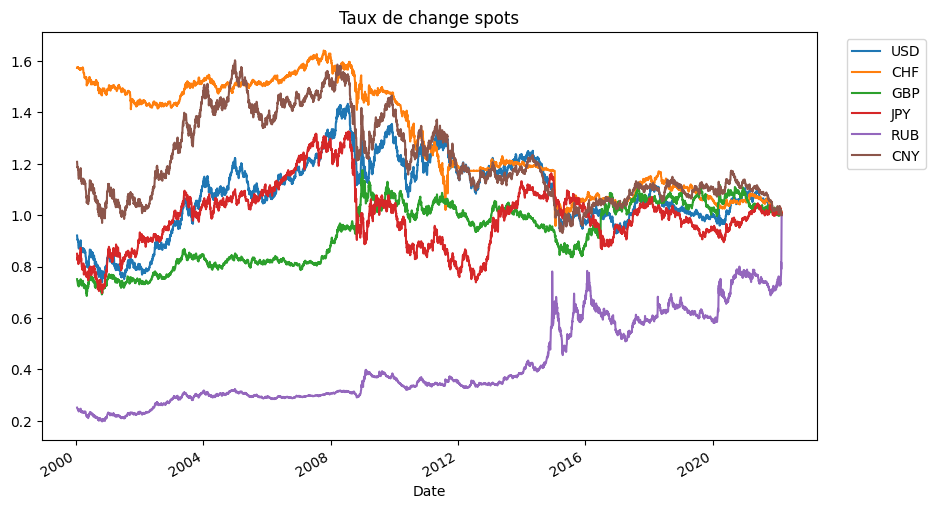

In [140]:
# Taux de change spots 
fig, ax = plt.subplots(figsize=(10,6))

((df_change0 / df_change0.iloc[-1])
 .plot
 .line(title="Taux de change spots", ax=ax)
 .legend(bbox_to_anchor=(1.15, 1.0))
);

#### Librairie sparklines

Une sparkline est une visualisation de données qui représente la forme générale de l'évolution d'une variable sur une ligne. La sparkline est en général insérée dans un texte et dans un tableau.

Source : 
- https://fr.wikipedia.org/wiki/Sparkline

In [141]:
# import
import sparklines

# example
print(sparklines.sparklines(pd.Series(range(8)))[0])

▁▂▃▄▅▆▇█


On affiche une sparkline donnant l'évolution trimestrielle du dollar en 2019.

In [142]:
# évolution trimestrielle du dollar en 2019
tab = (df_change0
       .loc["2019", "USD"]
       .resample('Q')
       .mean()
      )
tab

Date
2019-03-31    1.135771
2019-06-30    1.123700
2019-09-30    1.111942
2019-12-31    1.107106
Freq: Q-DEC, Name: USD, dtype: float64

In [143]:
# sparkline donnant l'évolution trimestrielle du dollar en 2019
print(sparklines.sparklines(tab)[0])

█▅▂▁


Il est possible de simplifier l'API de sparklines.

In [144]:
# sparkl
def sparkl(series):
    """Return a sparkline string for the given Series object"""
    return sparklines.sparklines(series)[0]

In [145]:
sparkl(tab)

'█▅▂▁'

**Exemples**
- Passer la fonction `prep_change0` en *method chaining*.
- Modifier le graphique en divisant les taux de change a) par leurs moyennes respectives b) par leurs dernières valeurs respectives.
- Vérifier que le graphique "fonctionne" lorsqu'on restreint la période temporelle considérée (par ex. `loc["2019":"2020"]`).
- Faire un graphique avec les taux de change divisés par leur moyennes respectives a) avec une moyenne mobile de 30 jours b) avec un maximum mobile de 100 jours.
- Produire un *DataFrame* avec les moyennes annuelles du cours du dollar (par exemple) arrondies à 3 décimales et des sparklines donnant les tendances trimestrielles.
- Rajouter un style pour que les moyennes annuelles apparaissent en vert si elles sont supérieures à 1.0 et en rouge sinon.
- Ecrire une fonction qui pour une année donnée produit un *DataFrame* avec les moyennes annuelles des cours des différentes devises et des sparklines donnant leurs tendances trimestrielles.

In [ ]:
# %load exemples/09_prep_change
def prep_change(df, currencies):

    pass

df_change1 = prep_change(df_change, ["USD", "CHF", "GBP", "JPY", "RUB", "CNY"])


In [149]:
# %load exemples/10_plot_change.py
# Taux de change divisés par la moyenne
fig, ax = plt.subplots(figsize=(10,6))

(df_change1
 .pipe(lambda df_: df_.div(df_.mean()))
 .plot
 .line(title="Taux de change divisés par la moyenne", ax=ax)
 .legend(bbox_to_anchor=(1.05, 1.0))
);

# Taux de change divisés par la dernière valeur
fig, ax = plt.subplots(figsize=(10,6))

(df_change1
 .pipe(lambda df_: df_.div(df_.iloc[-1]))
 .plot
 .line(title="Taux de change divisés par la dernière valeur", ax=ax)
 .legend(bbox_to_anchor=(1.05, 1.0))
);
# Moyenne glissante sur 30 jours
fig, ax = plt.subplots(figsize=(10,6))

(df_change1
 .pipe(lambda df_: df_.div(df_.mean()))
 .rolling(30)
 .mean()
 .plot
 .line(title="Moyenne glissante sur 30 jours", ax=ax)
 .legend(bbox_to_anchor=(1.05, 1.0))
);

# Maximum glissant sur 100 jours
fig, ax = plt.subplots(figsize=(10,6))

(df_change1
 .pipe(lambda df_: df_.div(df_.mean()))
 .rolling(100)
 .max()
 .plot
 .line(title="Maximum glissant sur 100 jours", ax=ax)
 .legend(bbox_to_anchor=(1.05, 1.0))
);

# moyenne et tendance pour USD
(df_change1
 .groupby(pd.Grouper(freq='A'))
 .agg(USD=('USD', lambda s_: s_.mean().round(3)),
      trend_USD=('USD', lambda s_: sparkl(s_.resample('Q').mean())))
)

# moyenne et tendance pour toutes les devises
def mean_trend_year(year):
    return (df_change1
           .loc[str(year)]
           .pipe(lambda df_: pd.concat([df_.mean(), (df_
                                                     .resample('Q')
                                                     .mean()
                                                     .apply(sparkl))],
                             axis=1))
           .rename({0: 'mean', 1:'trend'}, axis=1)
           )


In [147]:
df_change0.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5665 entries, 2000-01-13 to 2022-03-01
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   USD     5665 non-null   float64
 1   CHF     5665 non-null   float64
 2   GBP     5665 non-null   float64
 3   JPY     5665 non-null   float64
 4   RUB     5665 non-null   float64
 5   CNY     5665 non-null   float64
dtypes: float64(6)
memory usage: 309.8 KB


In [146]:
(df_change0
       .resample('A')["USD"]
       .mean()
      )

Date
2000-12-31    0.920236
2001-12-31    0.895630
2002-12-31    0.945574
2003-12-31    1.131160
2004-12-31    1.243902
2005-12-31    1.244090
2006-12-31    1.255599
2007-12-31    1.370478
2008-12-31    1.470755
2009-12-31    1.394782
2010-12-31    1.325717
2011-12-31    1.391955
2012-12-31    1.284789
2013-12-31    1.328118
2014-12-31    1.328501
2015-12-31    1.109513
2016-12-31    1.106903
2017-12-31    1.129681
2018-12-31    1.180955
2019-12-31    1.119475
2020-12-31    1.142196
2021-12-31    1.182740
2022-12-31    1.132390
Freq: A-DEC, Name: USD, dtype: float64

In [151]:
(df_change0
# .groupby(pd.Grouper(freq='A'))
 .resample("A")
 .agg(USD=('USD', lambda s_: s_.mean().round(3)),
      trend_USD=('USD', lambda s_: sparkl(s_.resample('Q').mean())))
)

,USD,trend_USD
Date,,
2000-12-31,0.920,█▅▃▁
2001-12-31,0.896,█▁▃▄
2002-12-31,0.946,▁▃▇█
2003-12-31,1.131,▁▅▄█
2004-12-31,1.244,▄▁▂█
2005-12-31,1.244,█▅▃▁
2006-12-31,1.256,▁▆▇█
2007-12-31,1.370,▁▃▄█
2008-12-31,1.471,▆█▆▁


### 5.2 Online Retail

Dataset *Online Retail* de Kaggle : https://www.kaggle.com/vijayuv/onlineretail

- Ela Kapoor, *Time series and feature engg analysis for retail*, (2021) https://www.kaggle.com/elakapoor/time-series-and-feature-engg-analysis-for-retail

**Exemples**
- Charger le dataset avec la fonction `load_raw_csv` et vérifier les valeurs manquantes.
- Ecrire une fonction de préparation du dataset :
    - suppression des lignes dupliquées
    - utiliser des types optimisés pour "Quantity" et "UnitPrice" (float32)
    - convertir "InvoiceDate" en date
- Faire un graphique à barres avec les volumes des transactions selon les heures
- Faire des graphiques à secteurs avec les volumes et les montants des transactions "UK" / "Non UK"
- Faire des graphiques à barres avec les volumes et les montants des transactions par pays "Non UK"
- Faire des graphiques à barres avec les volumes et les montants des transactions par type "Purchase" (Quantity &geq; 0) ou "Return" (Quantity &lt; 0)
- Produire un *DataFrame* avec les moyennes des montants des transactions par pays arrondies à 2 décimales triées par ordre décroissant et des sparklines donnant les tendances trimestrielles.

In [ ]:
# load raw CSV
df_or = load_raw_csv("data/OnlineRetail.csv.zip", encoding='unicode_escape')
df_or.head()

In [ ]:
# %load exemples/11_prep_retail.py

def prep_retail(df):
    pass

In [ ]:
# %load exemples/12_plot_retail.py


## 6. Conclusion

Voir si la *Method chaining* tient ses promesses :
- Normaliser l'écriture du code avec **pandas**
- Faciliter la compréhension et la maintenance du code
- Optimiser l'utilisation de la mémoire

<div>
<h1 style="font-weight: bold; font-style: italic; margin: 10px; color: rgb(231, 4, 136);">pynk</h1>

**write better pandas code**

https://pynk.yotta-conseil.fr
</div>